# Q5

## (a)

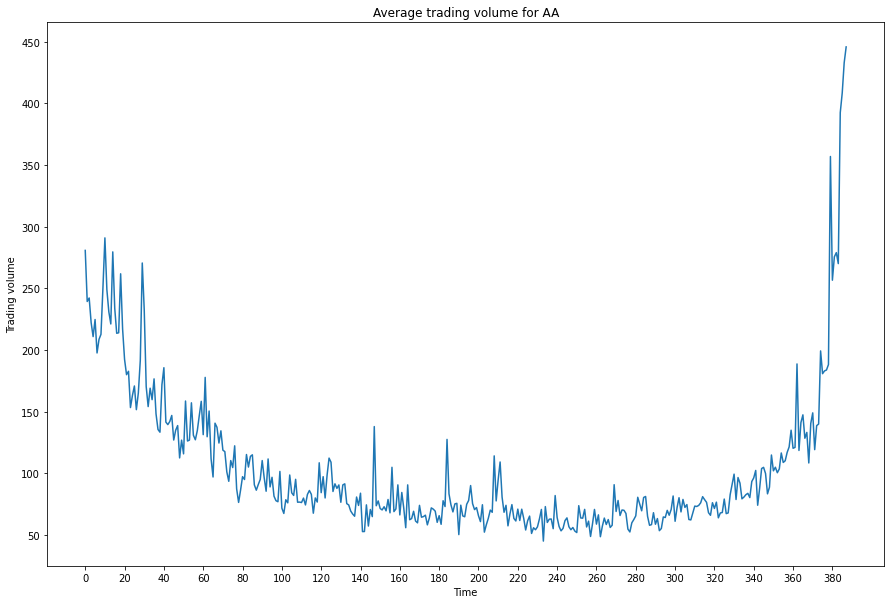

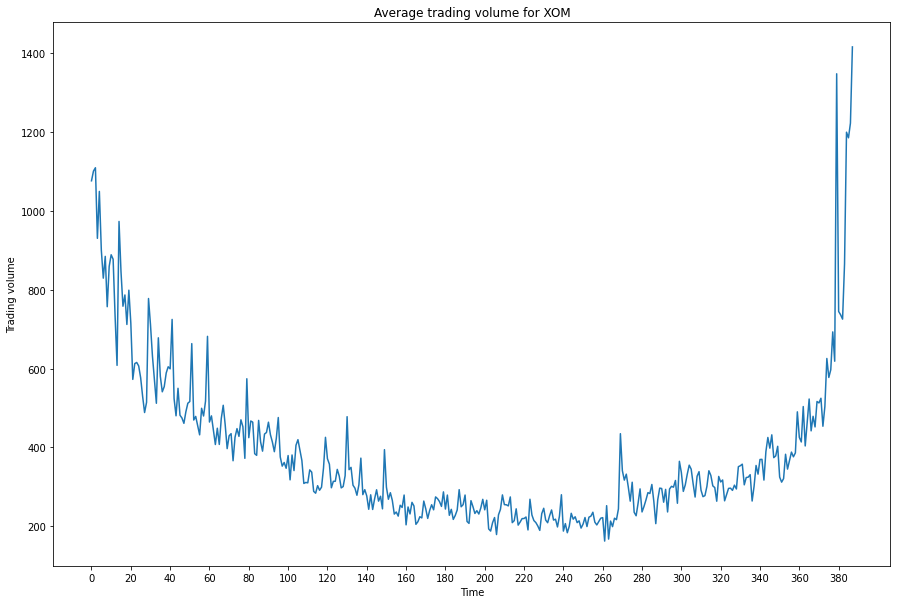

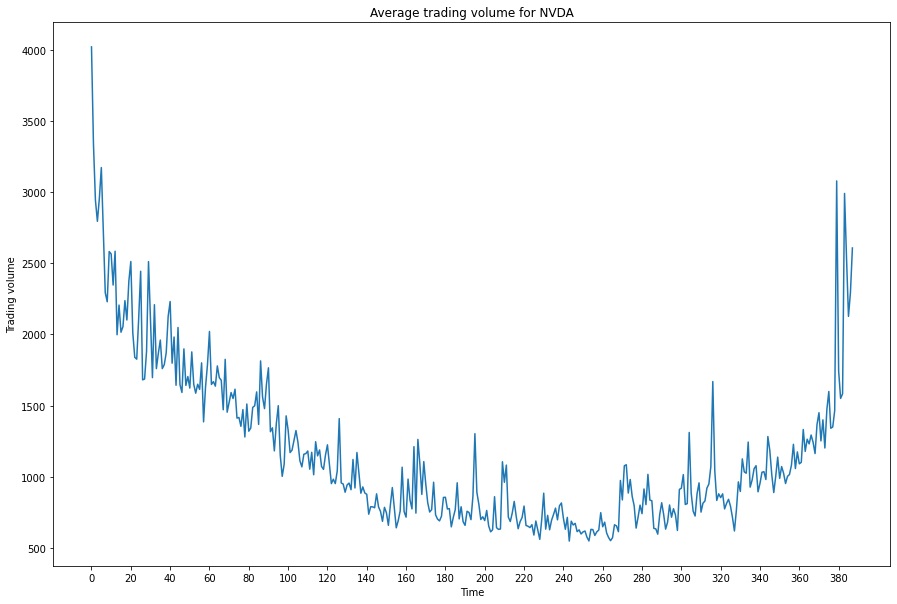

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt


date_range = pd.date_range(start='2022-01-03', end='2022-02-01', freq='D')
date_string = [i.strftime('%Y%m%d') for i in date_range]
n = len(date_string)

time_range = pd.date_range(start="09:32", end="15:59", freq='T')
ind = time_range.strftime('%H:%M:%S')

def pre_process(ticker):
    path = './' + ticker + '/bars.' + ticker + '.'
    df = pd.DataFrame()
    for i in range(n):
        file_path = path + date_string[i]
        if os.path.exists(file_path):
            temp = pd.read_csv(file_path, sep=' ')[['time','trade_count']]
            temp['time'] = pd.to_datetime(temp['time'], format='%H:%M:%S')
            start_time = pd.to_datetime('09:32:00', format='%H:%M:%S')
            end_time = pd.to_datetime('15:59:00', format='%H:%M:%S')
            # Filter the DataFrame to include only times between 9:32 AM and 3:59 PM
            filtered_temp = temp[temp['time'].between(start_time, end_time)].copy()
            trade_vol = filtered_temp['trade_count']
            df = pd.concat([df,trade_vol],axis=1)
    df['avg'] = df.mean(axis=1)
    df.index = ind      
    return df['avg']

for ticker in ['AA', 'XOM', 'NVDA']:
    data = pre_process(ticker)
    plt.figure(figsize=(15, 10))
    plt.plot(data)
    plt.xticks(range(0,len(ind),20), range(0,len(ind),20))
    plt.ylabel('Trading volume')
    plt.xlabel('Time')
    plt.title('Average trading volume for '+ ticker)
    plt.show()

## (b)

Coefficient of Variation before adjusting:  0.7327609173958876
Coefficient of Variation after adjusting:  0.48987895087497624


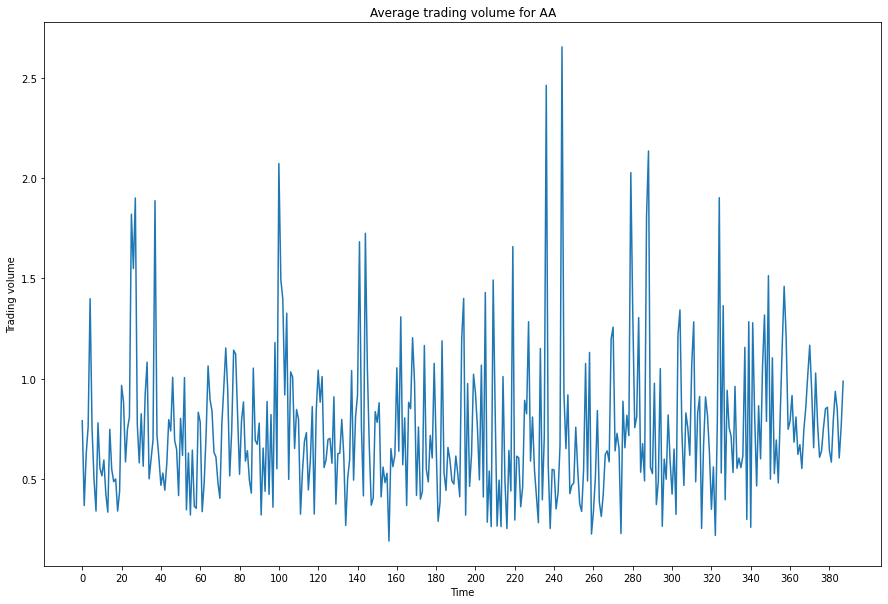

Coefficient of Variation before adjusting:  0.8305121692720882
Coefficient of Variation after adjusting:  0.45283298262192734


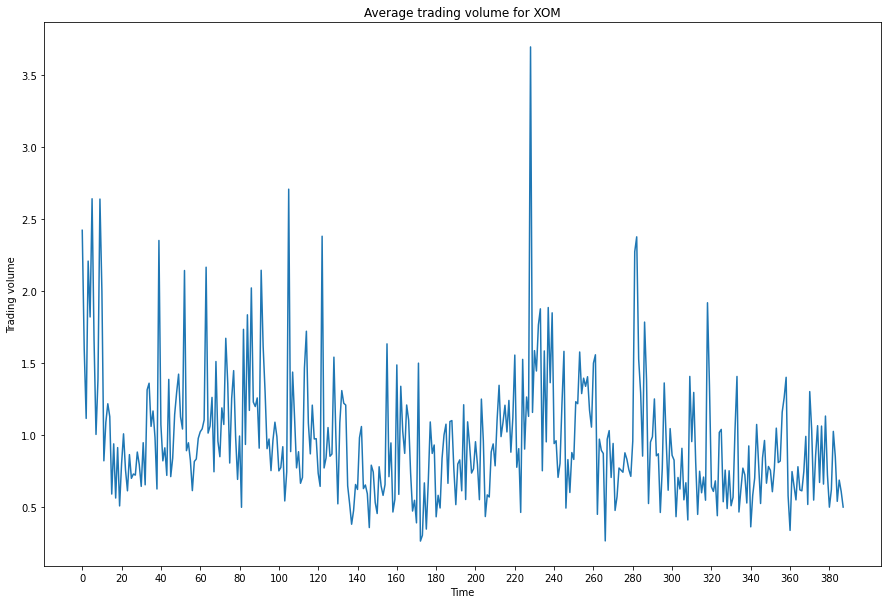

Coefficient of Variation before adjusting:  0.7578152343514046
Coefficient of Variation after adjusting:  0.3946634362804136


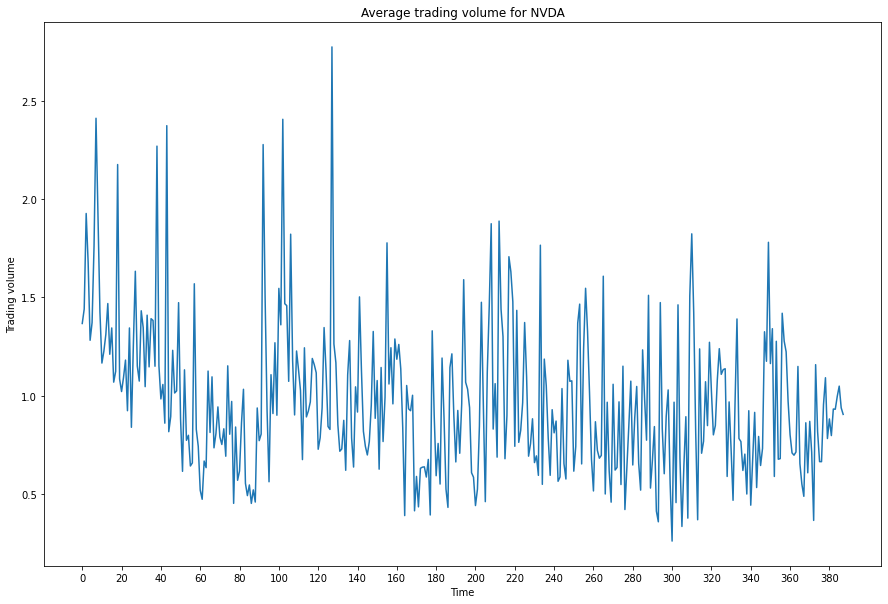

In [2]:
AA = pre_process('AA')
XOM = pre_process('XOM')
NVDA = pre_process('NVDA')
d = {'AA':AA, 'XOM':XOM, 'NVDA':NVDA}

for ticker in ['AA', 'XOM', 'NVDA']:
    path = './' + ticker + '/bars.' + ticker + '.20220202'
    temp = pd.read_csv(path, sep=' ')[['time','trade_count']]
    start_time = pd.to_datetime('09:32:00', format='%H:%M:%S')
    end_time = pd.to_datetime('15:59:00', format='%H:%M:%S')
    # Filter the DataFrame to include only times between 9:32 AM and 3:59 PM
    temp['time'] = pd.to_datetime(temp['time'], format='%H:%M:%S')
    filtered_temp = temp[temp['time'].between(start_time, end_time)].copy()
    trade_vol = filtered_temp['trade_count'] / d[ticker].values
    print('Coefficient of Variation before adjusting: ', filtered_temp['trade_count'].std()/filtered_temp['trade_count'].mean())
    print('Coefficient of Variation after adjusting: ', trade_vol.std()/trade_vol.mean())
    plt.figure(figsize=(15, 10))
    plt.plot(trade_vol.values)
    plt.xticks(range(0,len(ind),20), range(0,len(ind),20))
    plt.ylabel('Trading volume')
    plt.xlabel('Time')
    plt.title('Average trading volume for '+ ticker)
    plt.show()

#### The adjustment made the series of trading counts more stationary and avoided the pattern that the trading volumes near the opening and closing are typically high. We can see that the Coefficient of Variation decreases a lot on all three stocks after adjusting.

## (c)

As we are considering trading data from 09:32 to 15:59, there are 388 minutes in total. So our likelyhood function is 
$L(\lambda) = \prod_{i=1}^{388}\frac{(\frac{\lambda}{388})^{k_i}}{k_i !}e^{-\lambda/388}$. Maximizing the likelyhood function, we get $\lambda = \sum_{k=1}^{388} k_i$, which is the sum of trade counts.


In [3]:
lambdas = []
tickers = ['AA', 'XOM', 'NVDA']
for ticker in tickers:
    path = './' + ticker + '/bars.' + ticker + '.20220202'
    temp = pd.read_csv(path, sep=' ')[['time','trade_count']]
    start_time = pd.to_datetime('09:32:00', format='%H:%M:%S')
    end_time = pd.to_datetime('15:59:00', format='%H:%M:%S')
    # Filter the DataFrame to include only times between 9:32 AM and 3:59 PM
    temp['time'] = pd.to_datetime(temp['time'], format='%H:%M:%S')
    filtered_temp = temp[temp['time'].between(start_time, end_time)].copy()
    lambdas.append(filtered_temp['trade_count'].sum()) 

In [4]:
lambdas

[29862.0, 148809.0, 457907.0]

In [5]:
for i in range(3):
    print('For {}, the estimated lambda is {}'.format(tickers[i],lambdas[i]))

For AA, the estimated lambda is 29862.0
For XOM, the estimated lambda is 148809.0
For NVDA, the estimated lambda is 457907.0


# Q6

## (a)

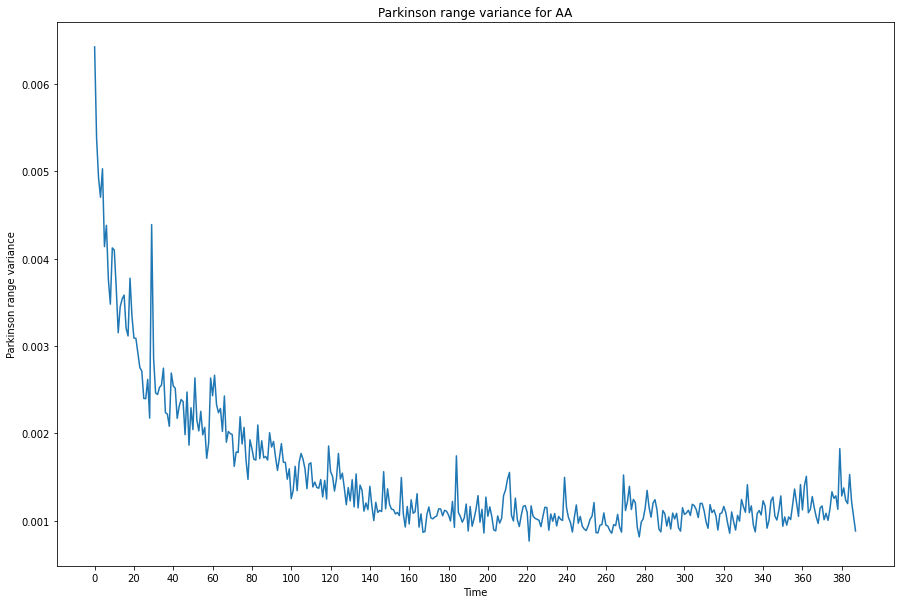

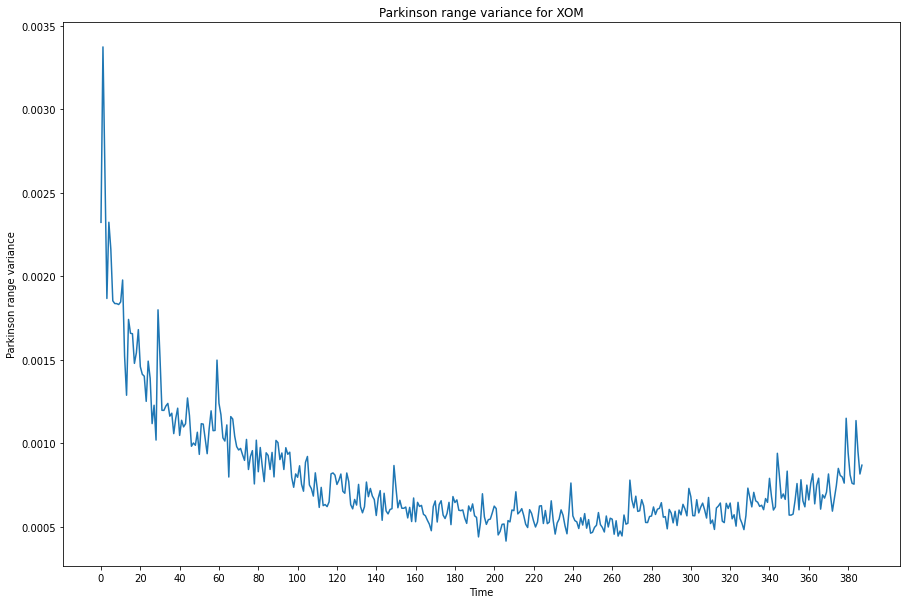

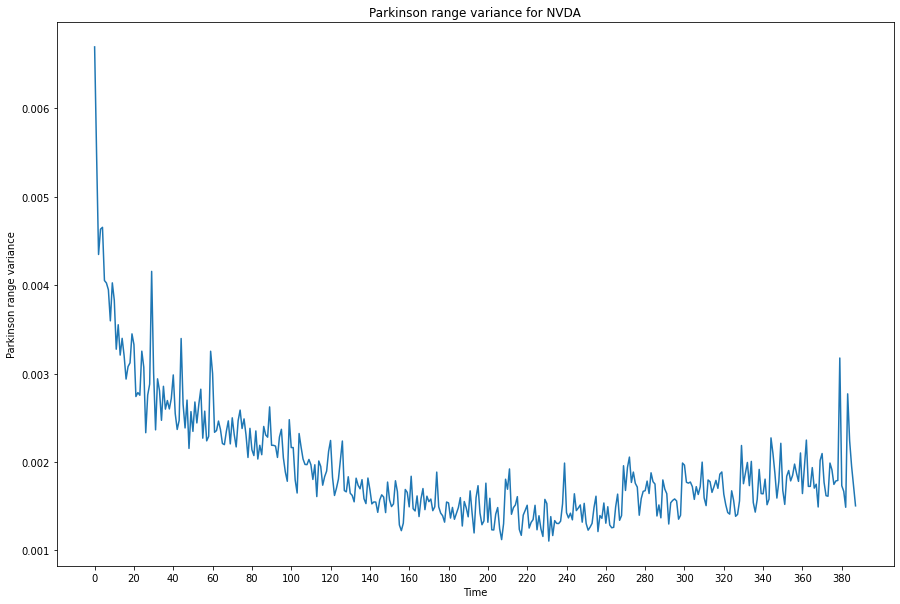

In [6]:
def Parkinson_est(ticker):
    path = './' + ticker + '/bars.' + ticker + '.'
    df = pd.DataFrame()
    for i in range(n):
        file_path = path + date_string[i]
        if os.path.exists(file_path):
            temp = pd.read_csv(file_path, sep=' ')
            temp['time'] = pd.to_datetime(temp['time'], format='%H:%M:%S')
            start_time = pd.to_datetime('09:32:00', format='%H:%M:%S')
            end_time = pd.to_datetime('15:59:00', format='%H:%M:%S')
            # Filter the DataFrame to include only times between 9:32 AM and 3:59 PM
            filtered_temp = temp[temp['time'].between(start_time, end_time)].copy()
            cont = np.log((filtered_temp['trade_high'] / filtered_temp['trade_low'])**2)
            df = pd.concat([df,cont], axis=1)
    df['Parkinson'] = df.mean(axis=1) / 4 / np.log(2)
    df.index = ind      
    return df['Parkinson']

for ticker in ['AA', 'XOM', 'NVDA']:
    data = Parkinson_est(ticker)
    plt.figure(figsize=(15, 10))
    plt.plot(data)
    plt.xticks(range(0,len(ind),20), range(0,len(ind),20))
    plt.ylabel('Parkinson range variance')
    plt.xlabel('Time')
    plt.title('Parkinson range variance for '+ ticker)
    plt.show()

## (b)

Coefficient of Variation before adjusting:  0.7366394059415643
Coefficient of Variation after adjusting:  0.4464814687620514


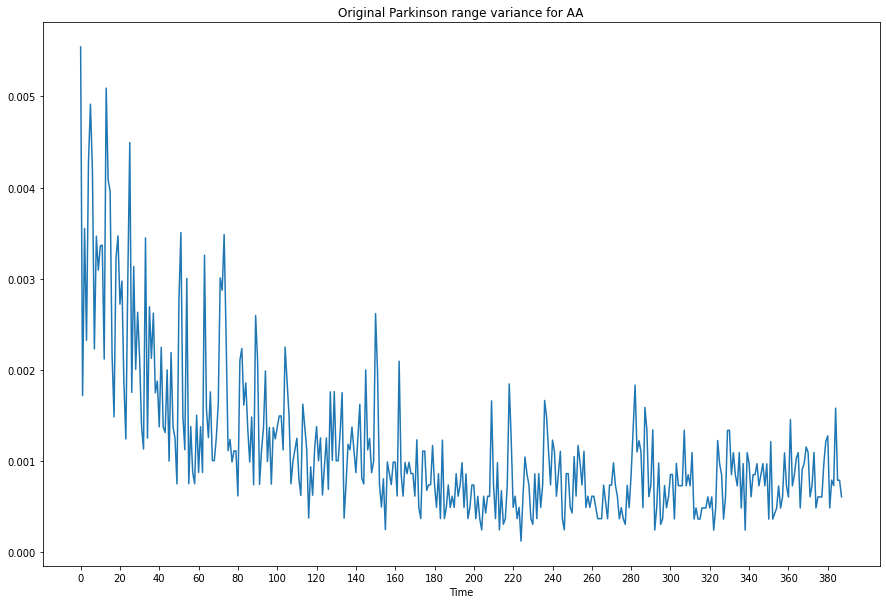

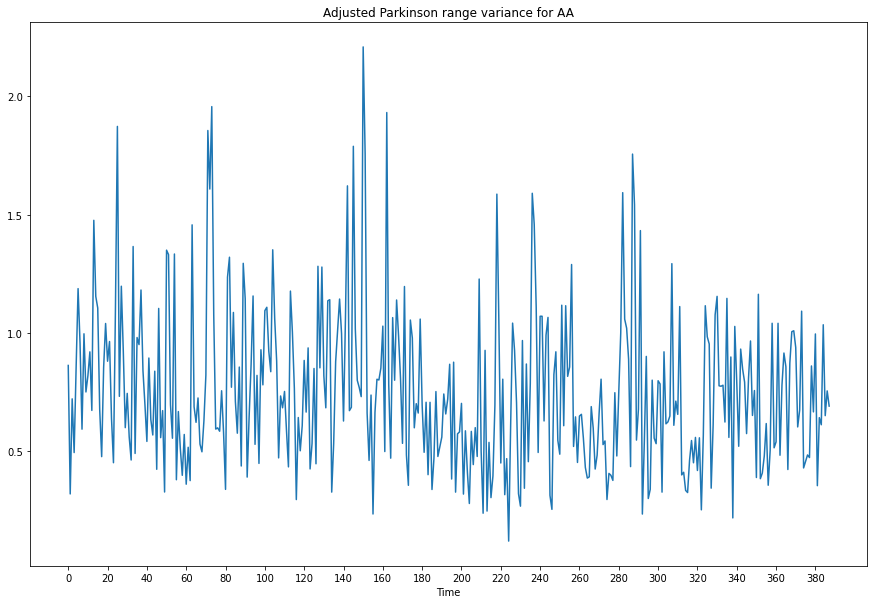

Coefficient of Variation before adjusting:  0.7235463992357822
Coefficient of Variation after adjusting:  0.4750837061584225


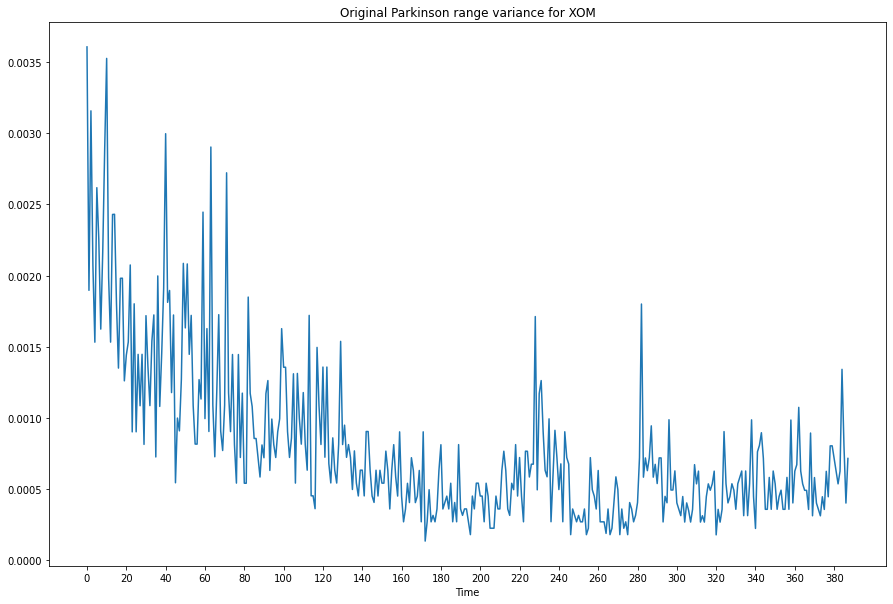

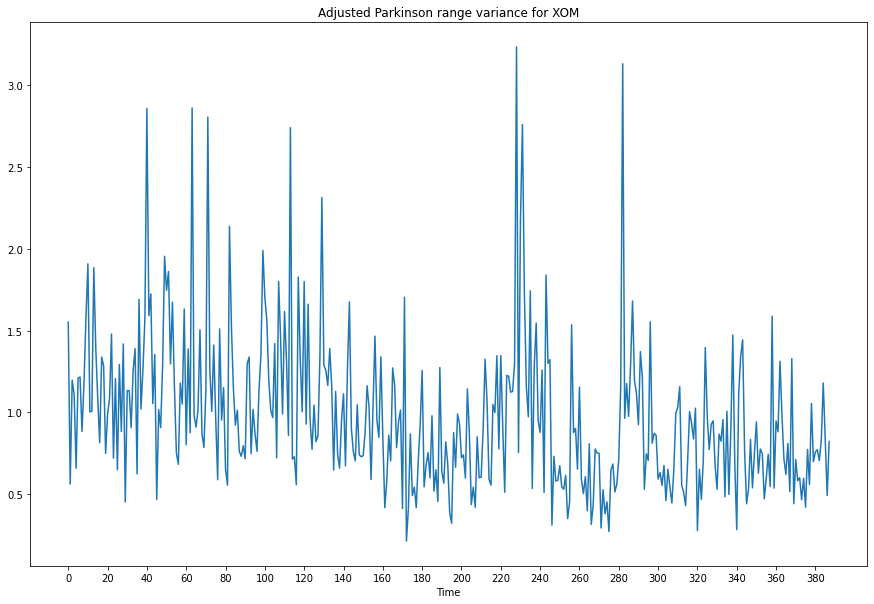

Coefficient of Variation before adjusting:  0.6189396956681262
Coefficient of Variation after adjusting:  0.40067175261823834


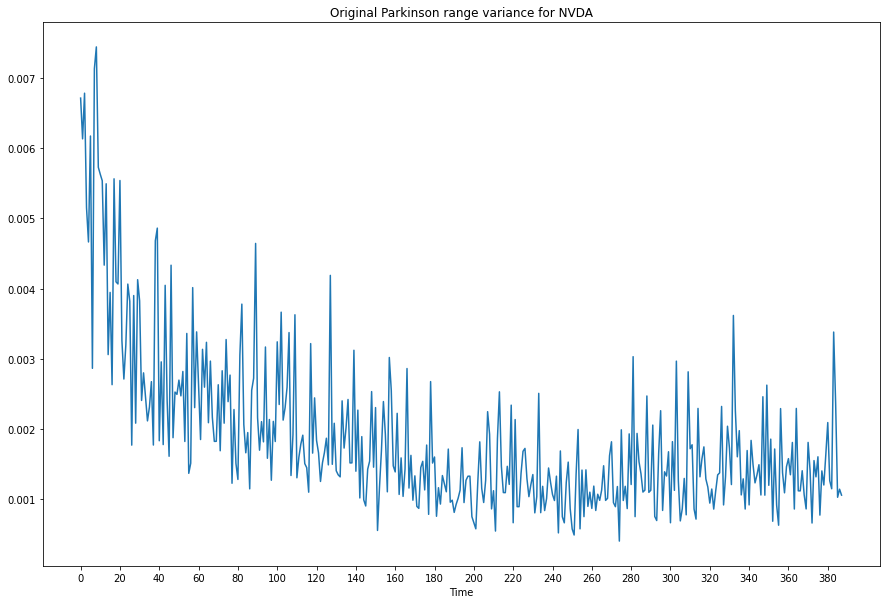

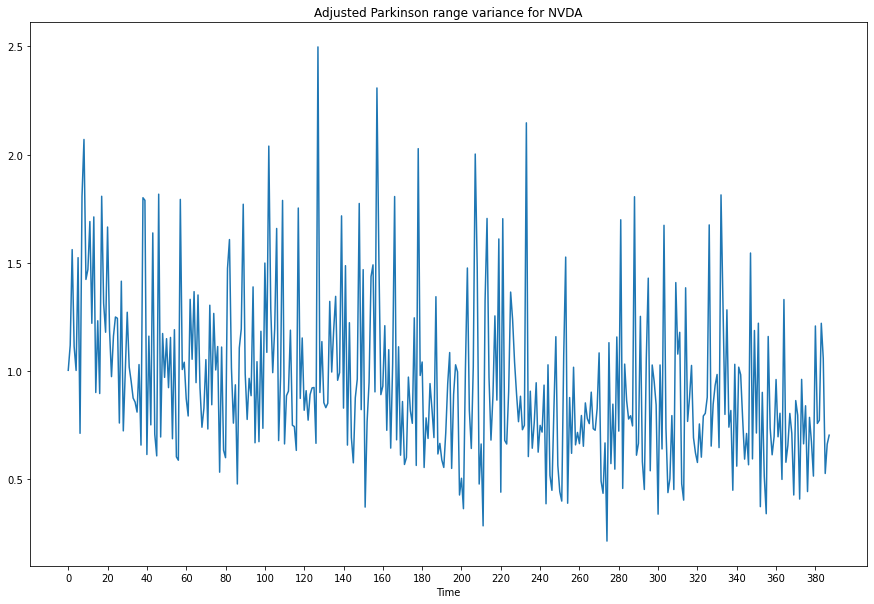

In [7]:
AA = Parkinson_est('AA')
XOM = Parkinson_est('XOM')
NVDA = Parkinson_est('NVDA')
d = {'AA':AA, 'XOM':XOM, 'NVDA':NVDA}

for ticker in ['AA', 'XOM', 'NVDA']:
    path = './' + ticker + '/bars.' + ticker + '.20220202'
    temp = pd.read_csv(path, sep=' ')
    start_time = pd.to_datetime('09:32:00', format='%H:%M:%S')
    end_time = pd.to_datetime('15:59:00', format='%H:%M:%S')
    # Filter the DataFrame to include only times between 9:32 AM and 3:59 PM
    temp['time'] = pd.to_datetime(temp['time'], format='%H:%M:%S')
    filtered_temp = temp[temp['time'].between(start_time, end_time)].copy()
    pks = np.log((filtered_temp['trade_high'] / filtered_temp['trade_low'])**2) / 4 / np.log(2)
    pks_adj = pks / d[ticker].values
    print('Coefficient of Variation before adjusting: ', pks.std()/pks.mean())
    print('Coefficient of Variation after adjusting: ', pks_adj.std()/pks_adj.mean())
    plt.figure(figsize=(15, 10))
    plt.plot(pks.values)
    plt.xticks(range(0,len(ind),20), range(0,len(ind),20))
    plt.xlabel('Time')
    plt.title('Original Parkinson range variance for '+ ticker)
    plt.show()
    plt.figure(figsize=(15, 10))
    plt.plot(pks_adj.values)
    plt.xticks(range(0,len(ind),20), range(0,len(ind),20))
    plt.xlabel('Time')
    plt.title('Adjusted Parkinson range variance for '+ ticker)
    plt.show()

#### We can see that the Coefficient of Variation also decreases dramatically on all three stocks after adjusting, which justifies the efficacy of adjustments, and our data is stationalized.

## (c)

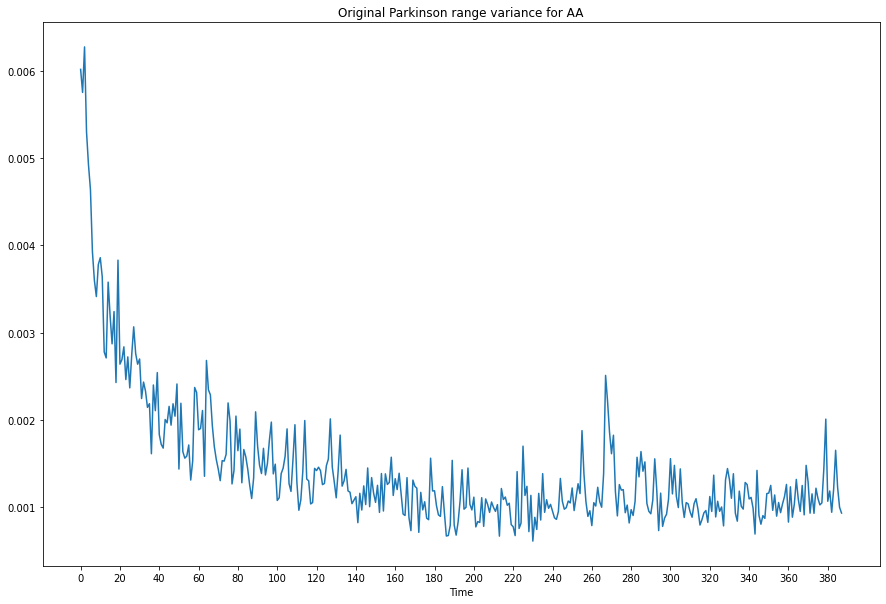

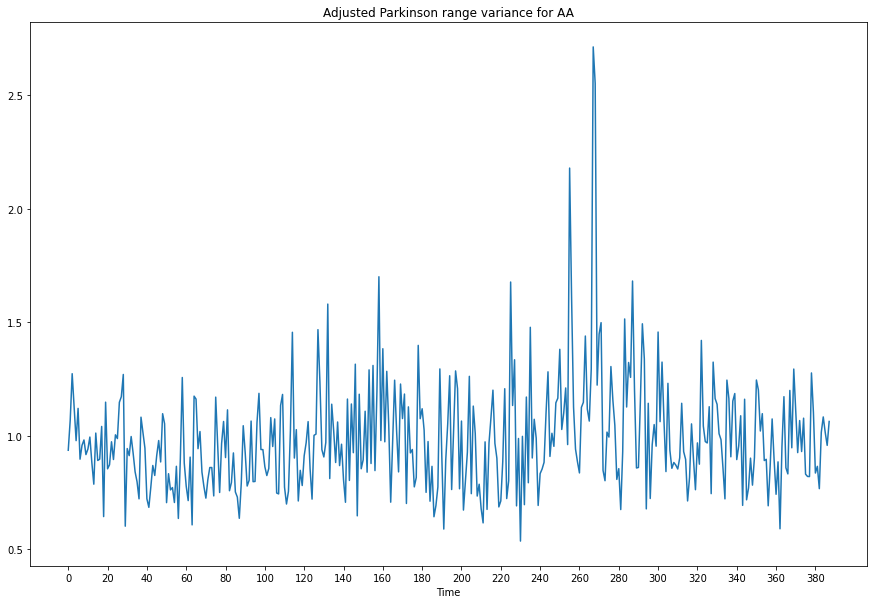

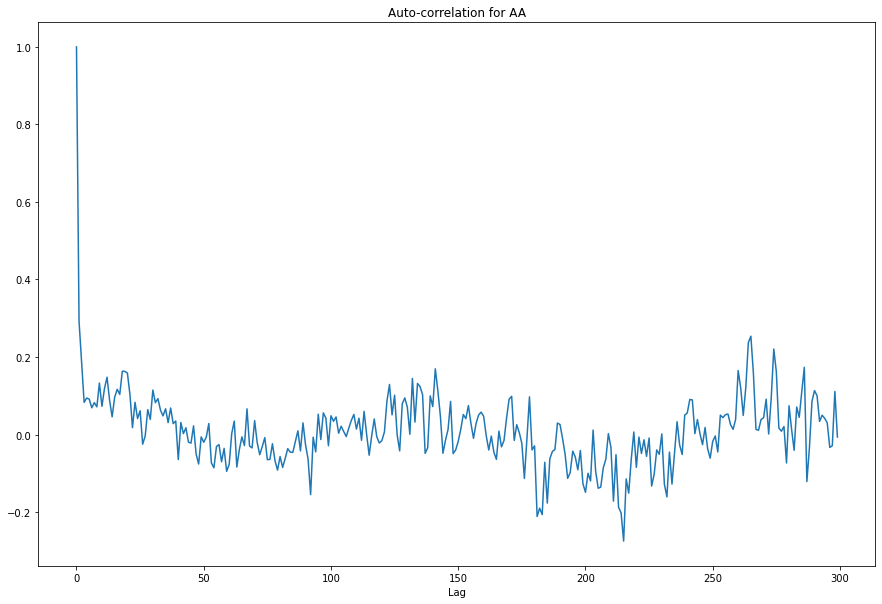

For AA, under 95% confidence level using Ljung-Box Q-test, the auto-correlation is significant under the following lags:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

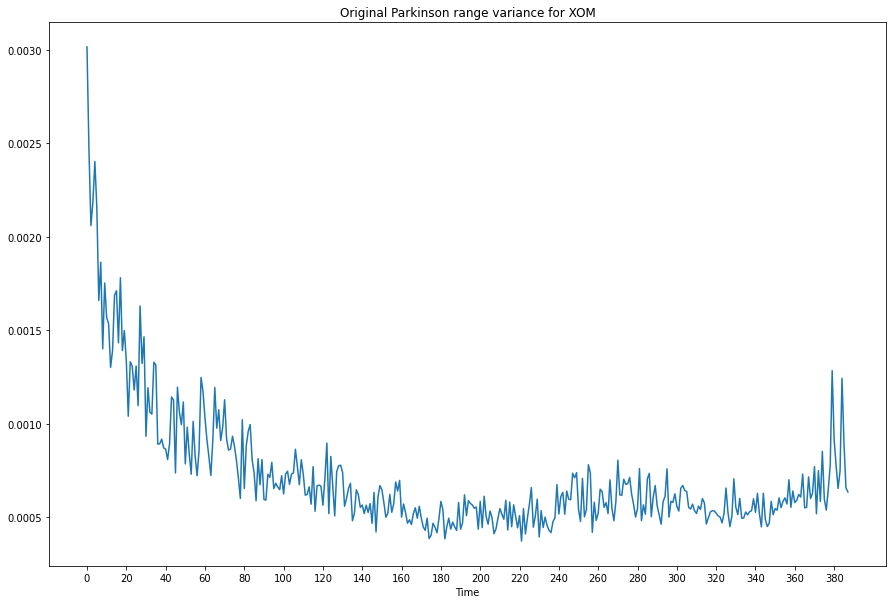

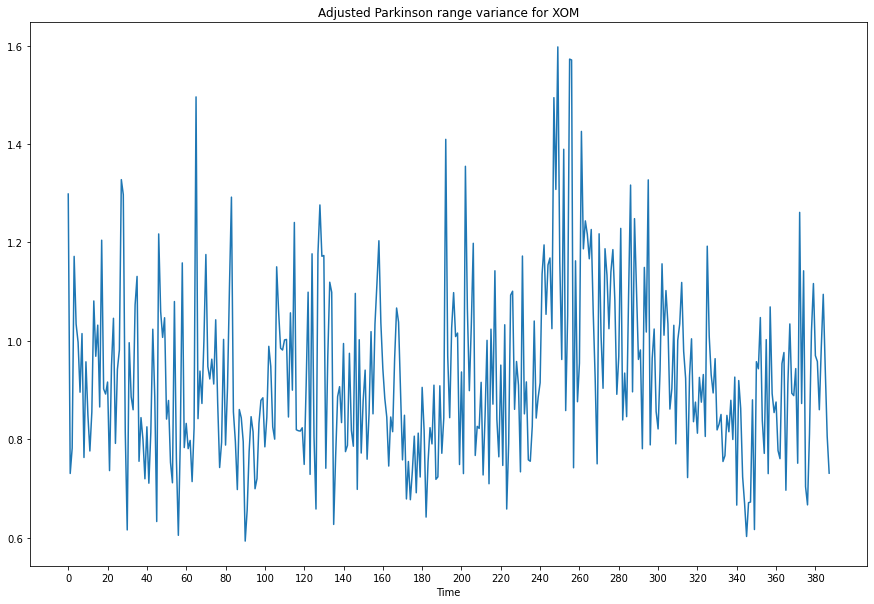

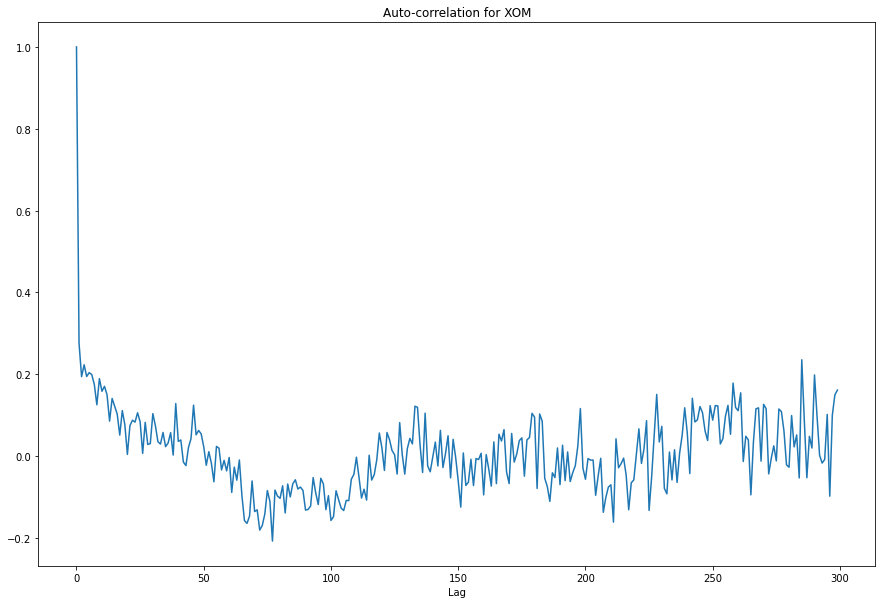

For XOM, under 95% confidence level using Ljung-Box Q-test, the auto-correlation is significant under the following lags:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 

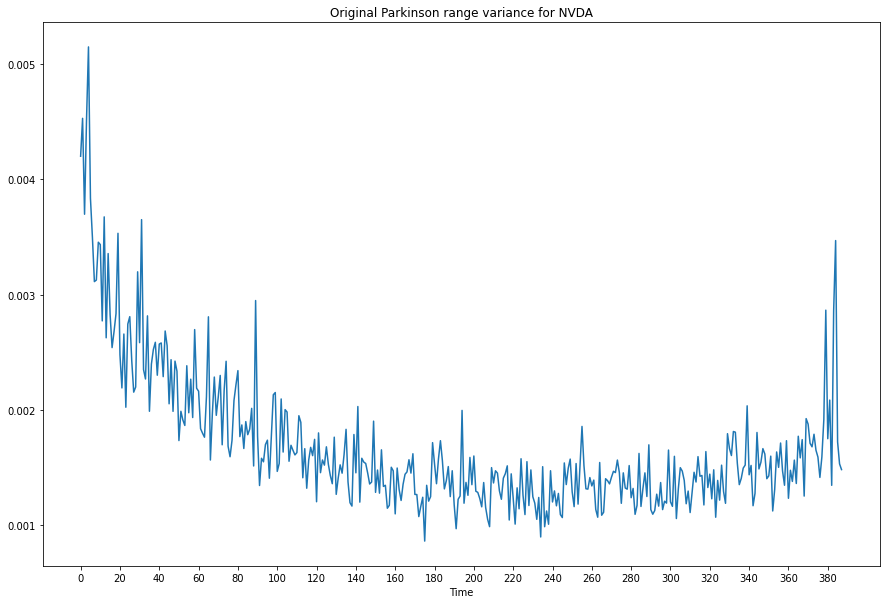

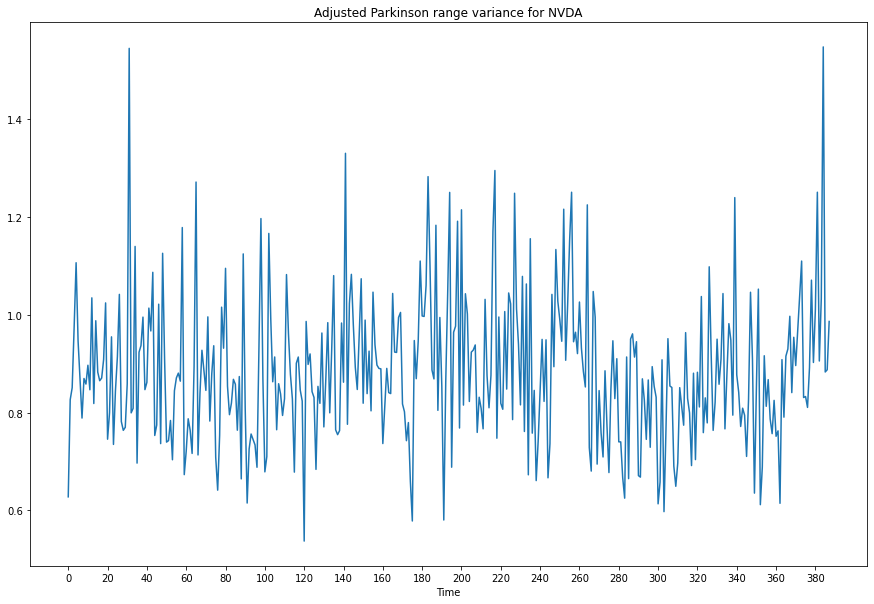

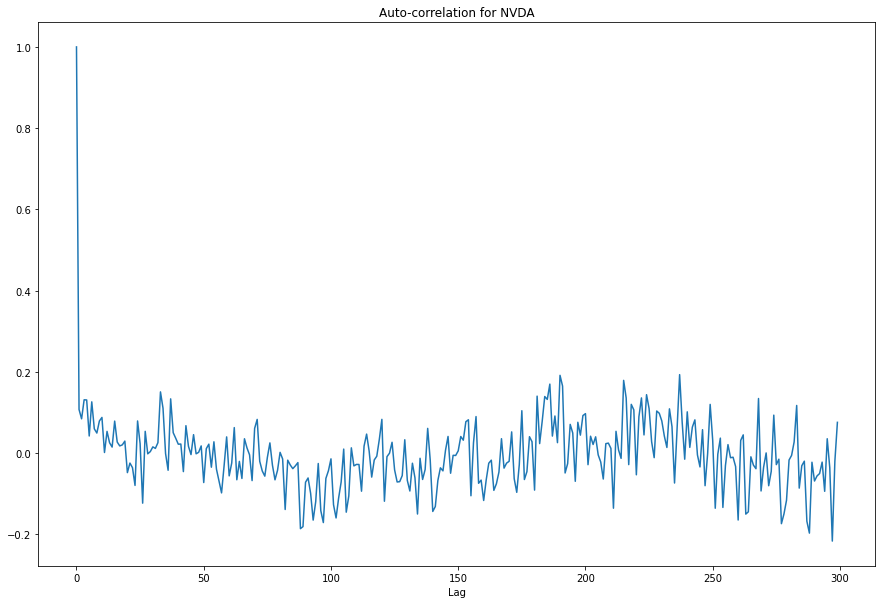

For NVDA, under 95% confidence level using Ljung-Box Q-test, the auto-correlation is significant under the following lags:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 82, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206

In [8]:
date_range = pd.date_range(start='2022-02-03', end='2022-02-11', freq='D')
date_string = [i.strftime('%Y%m%d') for i in date_range]
n = len(date_string)

for ticker in ['AA', 'XOM', 'NVDA']:
    path = './' + ticker + '/bars.' + ticker + '.'
    df = pd.DataFrame()
    for i in range(n):
        file_path = path + date_string[i]
        if os.path.exists(file_path):
            temp = pd.read_csv(file_path, sep=' ')
            temp['time'] = pd.to_datetime(temp['time'], format='%H:%M:%S')
            start_time = pd.to_datetime('09:32:00', format='%H:%M:%S')
            end_time = pd.to_datetime('15:59:00', format='%H:%M:%S')
            # Filter the DataFrame to include only times between 9:32 AM and 3:59 PM
            filtered_temp = temp[temp['time'].between(start_time, end_time)].copy()
            cont = np.log((filtered_temp['trade_high'] / filtered_temp['trade_low'])**2)
            df = pd.concat([df,cont], axis=1)
    df['Parkinson'] = df.mean(axis=1) / 4 / np.log(2)
    df['Adj_Parkinson'] = df['Parkinson'] / d[ticker].values
    plt.figure(figsize=(15, 10))
    plt.plot(df['Parkinson'].values)
    plt.xticks(range(0,len(ind),20), range(0,len(ind),20))
    plt.xlabel('Time')
    plt.title('Original Parkinson range variance for '+ ticker)
    plt.show()
    plt.figure(figsize=(15, 10))
    plt.plot(df['Adj_Parkinson'].values)
    plt.xticks(range(0,len(ind),20), range(0,len(ind),20))
    plt.xlabel('Time')
    plt.title('Adjusted Parkinson range variance for '+ ticker)
    plt.show()
    # next we calculate auto corr
    import statsmodels.api as sm
    auto_corr = []
    for lag in range(300):
        auto_corr.append(df['Adj_Parkinson'].autocorr(lag=lag))
    plt.figure(figsize=(15, 10))
    plt.plot(auto_corr)
    plt.xlabel('Lag')
    plt.title('Auto-correlation for '+ ticker`)
    plt.show()
    test_result = sm.stats.acorr_ljungbox(df['Adj_Parkinson'], lags=300)
    flag = False
    sig = []
    for i in range(len(test_result)):
        if test_result['lb_pvalue'].iloc[i] < 0.05:
            sig.append(i+1)
            flag = True
    if flag:
        print('For {}, under 95% confidence level using Ljung-Box Q-test, the auto-correlation is significant under the following lags:'.format(ticker))
        print(sig)
    else:
        print('For {}, the auto-correlation is not significant for lag less than 300.'.format(ticker))
    


### We can see that the adjusted data shows very strong auto-correlation, and under Ljung-Box Q-test, with most of the lags less than 300, the auto-correlation is significant.